<a href="https://colab.research.google.com/github/ahmed05islam-del/a7med/blob/main/marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Marketing Campaign Data Analysis

**Welcome, aspiring data analysts!** In this assignment, you will work with a real-world marketing campaign dataset. Your goal is to clean, transform, explore, and engineer new features to prepare the data for analysis and, eventually, for machine learning models.

Follow the steps in this guide to make the data ready for insightful analysis.

---

### Initial Setup
First, let's import the necessary libraries for our analysis.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set(style='whitegrid')

---

## 📚 Part 1: Data Cleaning & Exploratory Data Analysis (EDA)

**Goal:** To understand the raw dataset, identify any initial problems, and perform basic cleaning.

### 1. Load and Explore the Data

**Task:** Load the `marketing_campaign.csv` file into a Pandas DataFrame. Remember that the separator in this file is a tab (`\t`).

In [18]:
# TASK: Load the dataset
df = pd.read_csv('/content/marketing_campaign.csv',sep='\t')

**Task:** Use the `.head()`, `.info()`, `.describe()`, and `.shape` functions to get a first look at your data.

In [5]:
# Get the first 5 rows

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Get statistical summary for numerical columns
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Get the dimensions of the DataFrame (rows, columns)
df.shape

(2240, 29)

**Question:** Based on these initial outputs, what are your first observations about the data types, number of entries, and potential missing values?

**Your Answer Here:**

*Type your observations here. For example:*
-
-
-


### 2. Data Cleansing

You will notice two columns, `Z_CostContact` and `Z_Revenue`, that have the same value for every single row.

**Explain:** Why are columns with a single, constant value not useful for building machine learning models?

**Your Answer Here:**

*Type your explanation here. Think about what a model tries to learn. If a feature doesn't change, what can the model learn from it?*

**Task:** Remove these two columns from your DataFrame.

---

## 📝 Part 2: Handling Missing Data

**Goal:** To properly address empty (`NaN`) values to ensure data quality.

### 1. Identify Missing Values

**Task:** Use the `.isna().sum()` function to identify which columns contain missing values and how many.

In [19]:
# TASK: Find the sum of missing values for each column
df.isna().sum()[df.isna().sum() > 0]


,0
Income,24


### 2. Imputation Strategy

**Task:** Fill the missing values in the `Income` column using the column's **mean**.

In [21]:
# TASK: Fill missing income values with the mean
df['Income'].isna().sum()



# Verify that there are no more missing values

df.isna().sum()




,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Question:** Why might using the mean be a suitable choice here? In what situations might using the **median** be a better choice?

**Your Answer Here:**

*Type your explanation here. Consider the effect of outliers on the mean and median.*

---

## 🛠️ Part 3: Feature Engineering & Transformation

**Goal:** To create new, more meaningful features from existing ones to improve model performance.

### 1. Create New Features

**Task:** Create the new features as described below.
- Create New Features: Create the following new columns in your DataFrame:

- Age: Calculate the customer's age from the Year_Birth column. (You can use 2025 as the current year for calculation).

- Kids: Create a feature for the total number of children in the household by summing Kidhome and Teenhome.

- Expenses: Create a column representing the total amount spent by summing all columns that start with Mnt... (e.g., MntWines, MntFruits, etc.).

- TotalAcceptedCmp: Create a column that counts the total number of campaigns a customer responded to. Sum the columns from AcceptedCmp1 to AcceptedCmp5 and the Response column.

- NumTotalPurchases: Create a column for the total number of purchases made. Sum the NumWebPurchases, NumCatalogPurchases, NumStorePurchases, and NumDealsPurchases columns.

- day_engaged: Create a feature that shows how many days a customer has been with the company. (Hint: You will need to convert the Dt_Customer column to a datetime format and then calculate the difference between that date and a recent date, like '2025-01-01').



In [23]:

df['Age'] = 2025 - df['Year_Birth']
df['Age'].head()



,Age
0,68
1,71
2,60
3,41
4,44


In [24]:
# TASK: Create 'Kids' column

df['Kids'] = df['Kidhome'] + df['Teenhome']
df[['Kidhome', 'Teenhome', 'Kids']].head()



,Kidhome,Teenhome,Kids
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1


In [25]:
# TASK: Create 'Expenses' column

df['Expenses'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)


df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Expenses']].head()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Expenses
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


In [26]:
# TASK: Create 'TotalAcceptedCmp' column
#
df['TotalAcceptedCmp'] = (
    df['AcceptedCmp1'] +
    df['AcceptedCmp2'] +
    df['AcceptedCmp3'] +
    df['AcceptedCmp4'] +
    df['AcceptedCmp5']
)
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'TotalAcceptedCmp']].head()


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [27]:
# TASK: Create 'NumTotalPurchases' column
# df['NumTotalPurchases'] = ...

df['NumTotalPurchases'] = (
    df['NumDealsPurchases'] +
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)
df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumTotalPurchases']].head()


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumTotalPurchases
0,3,8,10,4,25
1,2,1,1,2,6
2,1,8,2,10,21
3,2,2,0,4,8
4,5,5,3,6,19


In [40]:
# TASK: Create 'day_engaged' column


df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


reference_date = pd.to_datetime('2025-01-01')
df['day_engaged'] = (reference_date - df['Dt_Customer']).dt.days

df[['Dt_Customer', 'day_engaged']].head()


,Dt_Customer,day_engaged
0,2012-09-04,4502
1,2014-03-08,3952
2,2013-08-21,4151
3,2014-02-10,3978
4,2014-01-19,4000


### 2. Remove Redundant Columns

**Task:** Now that we have our new features, let's drop the old ones to avoid data duplication and noise.

In [49]:
cols_to_drop = [
    'Year_Birth', 'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'Dt_Customer'
]

# Drop columns safely, ignoring missing ones
df = df.drop(cols_to_drop, axis=1, errors='ignore')

# Display cleaned dataframe
display(df.head())


,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged
0,5524,Graduation,Single,58138.0,58,7,0,3,11,1,68,0,1617,0,25,4502
1,2174,Graduation,Single,46344.0,38,5,0,3,11,0,71,2,27,0,6,3952
2,4141,Graduation,Together,71613.0,26,4,0,3,11,0,60,0,776,0,21,4151
3,6182,Graduation,Together,26646.0,26,6,0,3,11,0,41,1,53,0,8,3978
4,5324,PhD,Married,58293.0,94,5,0,3,11,0,44,1,422,0,19,4000


---

## 📊 Part 4: Handling Categorical Data

**Goal:** To convert text-based data into a numerical format that models can understand.

### 1. Simplify Categories (Reducing Cardinality)

**Task:** Use `.value_counts()` to see the categories in `Marital_Status` and `Education`.

In [50]:
# TASK: Use .value_counts() to see the categories in Marital_Status and Education

# Check Marital_Status categories
print("Marital_Status:")
print(df['Marital_Status'].value_counts())
print("\n")

# Check Education categories
print("Education:")
print(df['Education'].value_counts())


Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [51]:
df['Marital_Status'].value_counts(dropna=False)
df['Education'].value_counts(dropna=False)


,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


**Task:** Combine the categories as described in the assignment instructions.

- Combine 'Married' and 'Together' into a single category called 'relationship'.

- Combine 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' into a single category called 'Single'.

- Task: Do the same for the Education column. For example, combine 'PhD', 'Master', '2n Cycle', and 'Graduation' into one category like 'Postgraduate' and 'Basic' into 'Undergraduate'.

In [52]:
# TASK: Simplify 'Marital_Status'


# TASK: Simplify 'Marital_Status'
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Relationship',
    'Together': 'Relationship',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
})

# TASK: Simplify 'Education'
df['Education'] = df['Education'].replace({
    'PhD': 'Postgraduate',
    'Master': 'Postgraduate',
    '2n Cycle': 'Postgraduate',
    'Graduation': 'Postgraduate',
    'Basic': 'Undergraduate'
})



# TASK: Simplify 'Education'

df['Marital_Status'].value_counts()
df['Education'].value_counts()



,count
Education,
Postgraduate,2186
Undergraduate,54


### 2. Categorical Encoding

**Explain:** In your own words, what is the difference between Label Encoding and One-Hot Encoding?

**Your Answer Here:**

*Type your explanation here. Think about what the output looks like for each method and if the resulting numbers have any order.*

**Task:** Use `LabelEncoder` to convert the simplified `Education` and `Marital_Status` columns into numbers.

In [53]:
from sklearn.preprocessing import LabelEncoder

# TASK: Apply LabelEncoder to the categorical columns
le = LabelEncoder()

df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

# Display the head to see the changes
display(df.head())


,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged
0,5524,0,1,58138.0,58,7,0,3,11,1,68,0,1617,0,25,4502
1,2174,0,1,46344.0,38,5,0,3,11,0,71,2,27,0,6,3952
2,4141,0,0,71613.0,26,4,0,3,11,0,60,0,776,0,21,4151
3,6182,0,0,26646.0,26,6,0,3,11,0,41,1,53,0,8,3978
4,5324,0,0,58293.0,94,5,0,3,11,0,44,1,422,0,19,4000


---

## 📈 Part 5: Detecting and Handling Outliers

**Goal:** To identify and manage extreme values (outliers) that could negatively affect model performance.

### 1. Detecting Outliers

A simple way to visualize outliers is with a box plot. Let's look at `Income` and `Age`.

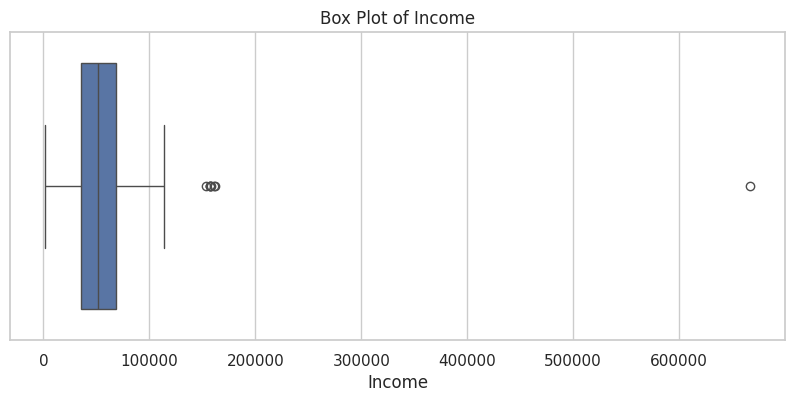

In [54]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Income'])
plt.title('Box Plot of Income')
plt.show()

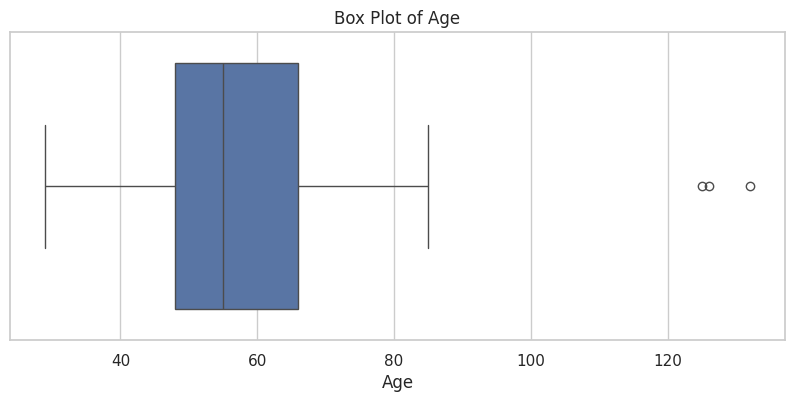

In [55]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()

**Question:** Why can outliers be a problem in data analysis and machine learning?

**Your Answer Here:**

*Type your explanation here. Think about how a very large or small value might affect calculations like the mean.*

### 2. Handling Outliers

**Task:** Remove the rows that contain these outliers. A common method is to remove values that are outside of 1.5 times the Interquartile Range (IQR). We will remove outliers from `Income` and `Age`.

In [57]:
print(f"Original shape: {df.shape}")


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df = remove_outliers_iqr(df, 'Income')
df = remove_outliers_iqr(df, 'Age')

print(f"Shape after removing outliers: {df.shape}")


df[['Income', 'Age']].describe()



Original shape: (2205, 16)
Shape after removing outliers: (2205, 16)


,Income,Age
count,2205.000000,2205.000000
mean,51622.094785,56.095692
std,20713.063826,11.705801
min,1730.000000,29.000000
25%,35196.000000,48.000000
50%,51287.000000,55.000000
75%,68281.000000,66.000000
max,113734.000000,85.000000


---

## 🔪 Part 6: Data Splitting & Feature Scaling

**Goal:** To prepare the final dataset for training and testing a model.

### 1. Train-Test Split

**Explain:** Why is it essential to split your data into a training set and a testing set?

**Your Answer Here:**

*Type your explanation here. What would happen if we tested the model on the same data it was trained on? Would that give us a true measure of its performance?*

**Task:** Define your target variable (`y`) as `NumTotalPurchases` and your features (`X`) as the rest of the columns. Use `train_test_split` to split your data into 85% for training and 15% for testing.

In [58]:
from sklearn.model_selection import train_test_split

# TASK: Define X and y
X = df.drop('NumTotalPurchases', axis=1)  # features
y = df['NumTotalPurchases']               # target

# TASK: Split the data (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (1874, 15)
X_test shape: (331, 15)


### 2. Feature Scaling

**Explain:** What is the importance of feature scaling? What is the difference between `StandardScaler` and `MinMaxScaler`?

**Your Answer Here:**

*Type your explanation here. Think about how models might treat a feature with a range of 0-1 versus a feature with a range of 10,000-100,000.*

**Task:** Use `StandardScaler` to scale the numerical features in your data. **Important:** `fit` the scaler **only** on the training data and then `transform` both the training and testing data.

In [59]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


scaler.fit(X_train[numerical_cols])

X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Scaled training data head:")
display(X_train.head())


Scaled training data head:


,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,Expenses,TotalAcceptedCmp,day_engaged
1844,0.900967,-0.155060,-0.732165,0.677535,-0.418333,0.675669,-0.103863,0.0,0.0,-0.421753,0.333994,1.420274,-0.356728,-0.445552,-0.730865
1183,-0.532829,6.449101,1.365812,-1.765499,0.928968,-0.143085,-0.103863,0.0,0.0,-0.421753,0.931966,1.420274,-0.866458,-0.445552,0.341604
1120,-1.446996,-0.155060,1.365812,0.910418,-1.558357,-0.961840,-0.103863,0.0,0.0,-0.421753,0.077721,0.071266,0.244323,-0.445552,-0.425851
1435,-1.424975,-0.155060,-0.732165,-0.992756,1.032606,1.085047,-0.103863,0.0,0.0,-0.421753,-0.861949,1.420274,-0.932873,0.986635,0.336684
1837,-1.605423,-0.155060,-0.732165,-0.189788,0.238044,0.266292,-0.103863,0.0,0.0,-0.421753,1.017390,0.071266,-0.555971,0.986635,0.548227


**Question:** What is the risk if you `fit` the scaler on the entire dataset *before* splitting it into training and testing sets?

**Your Answer Here:**

*Type your answer here. This is a concept called 'data leakage'. What information from the test set would 'leak' into the training process if you did this?*

---

## 🌟 Bonus Section: Dealing with Imbalanced Data (Theory)

**Goal:** To understand the challenges of working with imbalanced datasets.

**Theoretical Task:** Imagine you want to build a model to predict if a customer responded to *any* campaign.

In [60]:

df['Responded'] = np.where(df['TotalAcceptedCmp'] > 0, 1, 0)

print(df['Responded'].value_counts())


Responded
0    1747
1     458
Name: count, dtype: int64


**Task:** Briefly research and explain **two problems** that can arise from training a model on imbalanced data. Then, name and briefly describe **two techniques** used to solve this problem.



### **Congratulations on completing the assignment!**

Bias toward the majority class

Poor detection of the minority class

**Your Answer Here:**

**Problems:**
1. ...
2. ...

**Techniques:**
1. **SMOTE (Synthetic Minority Over-sampling Technique):** ...
2. **Undersampling:** ...